## ADDITIONAL 
Имеются две базы данных (два листа Excel-файла Data_TSUM.xlsx): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\\\, /.

Необходимо:

Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).

In [3]:
import pandas as pd
import numpy as np
df_parsing = pd.read_excel('./data/Data_TSUM.xlsx', sheet_name="Data_Parsing')
df_company = pd.read_excel('./data/Data_TSUM.xlsx', sheet_name='Data_Company')


In [132]:
display(df_parsing.info(), df_company.info())
display(df_parsing.describe(), df_company.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           75 non-null     object
 1   Category        75 non-null     object
 2   producer_id     75 non-null     object
 3   producer_color  75 non-null     object
 4   price           75 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          75 non-null     object
 1   Category       75 non-null     object
 2   item_id        75 non-null     object
 3   color_id       75 non-null     object
 4   current price  75 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


None

None

,price
count,75.00000
mean,219.80000
std,44.00952
min,153.00000
25%,181.00000
50%,211.00000
75%,258.00000
max,298.00000


,current price
count,75.000000
mean,222.400000
std,43.091041
min,153.000000
25%,188.500000
50%,227.000000
75%,253.500000
max,299.000000


In [33]:
# Очистим данные в таблице парсинг от "скверны" в виде спецсимволов

def kill_smb(string):
    return string.replace('_', '').replace('-', '').replace('~', '').replace('\\', '').replace(r'/', '')

df_parsing2 = df_parsing.copy()
df_parsing2['producer_color'] = df_parsing2['producer_color'].apply(kill_smb)
df_parsing2['producer_id'] = df_parsing2['producer_id'].apply(kill_smb)

display(df_parsing2)
    

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,256


In [42]:
# Мёржим данные из двух датафреймов для анализа
# Выделяем из таблицы компании только нужные поля
df_company_short = df_company[['item_id', 'color_id', 'current price']]
# df_merge = pd.concat([df_parsing, df_company_short], axis=1, join='inner', keys=[]) # Keys ??
df_merge = df_parsing2.merge(df_company_short, left_on=['producer_id', 'producer_color'], right_on=['item_id', 'color_id'], how='outer')
display(df_merge)


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222


In [152]:
# Добавляем колонку дельта цены
#df_merge['delta'] = df_merge['price']-df_merge['current price']
df_merge['delta_%'] = round((df_merge['price']-df_merge['current price'])/df_merge['current price']*100, 2)

display(df_merge)


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,delta_%
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,-32.39
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,16.77
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,-21.37
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,17.37
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,63.40
...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,-0.61
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,-19.39
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,-17.80
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,15.32


In [160]:
display(df_merge.head())
df_merge.drop(['goods'], axis=1, inplace=True)
display(df_merge.head())

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,delta_%,goods
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,-32.39,Valentino Shoes
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,16.77,Valentino Shoes
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,-21.37,Valentino Shoes
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,17.37,Valentino Shoes
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,63.40,Valentino Shoes


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,delta_%
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,-32.39
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,16.77
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,-21.37
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,17.37
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,63.40


In [153]:
# Метод Тьюки
def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned



In [154]:
# Z-sigm method
 
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned



In [156]:
display(df_merge.groupby(['brand', 'Category'])['delta_%'].mean().unstack()) # Сводная таблица, показывает среднее отклонение цены по группам
#display(df_merge)

# display(df_merge['Category'].unique())    # смотрим категории
# display(df_merge['brand'].unique())       # смотрим бренды



Category,Bags,Shoes
brand,,
Brioni,4.051818,5.303571
Stone Island,-0.906364,4.049286
Valentino,2.974545,0.088571


In [161]:
# Основной блок обработки
# Проходим в цикле по брендам и категориям

for b in df_merge['brand'].unique():
    for c in df_merge['Category'].unique():
        m1 = df_merge['brand']==b  
        m2 = df_merge['Category']==c
        mask = m1 & m2
        m=round(df_merge[mask]['delta_%'].mean(),2)                             # Считаем среднее отклонение для конкретной группы товаров одного бренда
        # print(f'Brand = {b}, Category = {c}, mean_delta = {m}')
        # df_merge.loc[mask,'mean_delta'] = m                                    # проставляем среднюю дельту отклонения по категориям и брендам товаров в каждую строку
        # df_merge.loc[mask,'drop']= df_merge['delta_%']-df_merge['mean_delta']  # проставляем отклонение от средней дельты в каджую строку
        df_merge.loc[mask,'goods'] = b+' '+c                                    # проставляем группу товаров - бренд + категория
        outliers_t, cleaned_t = outliers_iqr_mod(df_merge[mask], 'delta_%')     # вычисляем колчество выбросов для группы товаров по методу Тьюки
        #print(f'Число выбросов по методу Тьюки: {outliers_t.shape[0]}')
        #print(f'Результирующее число записей: {cleaned_t.shape[0]}')
        # print(f'Oultliers: {outliers_t}')
        #   df_merge['outliers']
        m3 = pd.DataFrame(outliers_t)                                           # Выбросы превращаем в датафрейм
        df_merge.loc[m3.index, 'outliers'] = 'Yes'                              # Проставляем признак выброса
        # display(df_merge[df_merge['outliers']=='Yes'])
        
display(df_merge[df_merge['outliers']=='Yes'])
df_merge = df_merge.fillna('No')
display(df_merge)


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,delta_%,goods,outliers
30,Brioni,Shoes,bbbbb111116,black,190,bbbbb111116,black,283,-32.86,Brioni Shoes,Yes
31,Brioni,Shoes,bbbbb111117,black,291,bbbbb111117,black,198,46.97,Brioni Shoes,Yes
34,Brioni,Shoes,bbbbb111120,white,169,bbbbb111120,white,256,-33.98,Brioni Shoes,Yes
38,Brioni,Shoes,bbbbb111124,white,298,bbbbb111124,white,183,62.84,Brioni Shoes,Yes
65,Stone Island,Bags,sssss111126,red,255,sssss111126,red,159,60.38,Stone Island Bags,Yes


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,delta_%,goods,outliers
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,-32.39,Valentino Shoes,No
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,16.77,Valentino Shoes,No
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,-21.37,Valentino Shoes,No
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,17.37,Valentino Shoes,No
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,63.40,Valentino Shoes,No
...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,-0.61,Stone Island Bags,No
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,-19.39,Stone Island Bags,No
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,-17.80,Stone Island Bags,No
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,15.32,Stone Island Bags,No


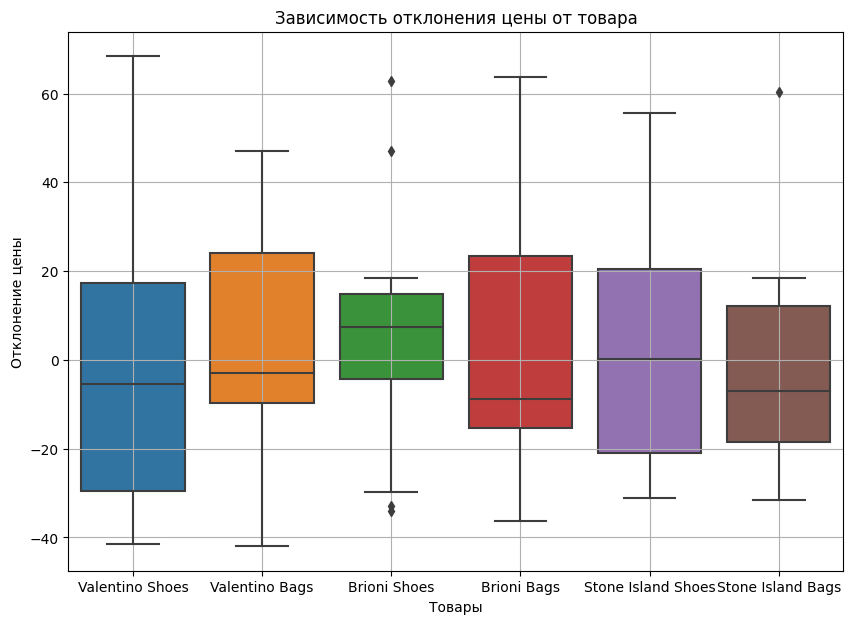

In [164]:
# Visualize exceptions
import matplotlib.pyplot as plt
import seaborn as sns

box_data = df_merge[['goods', 'delta_%']]
fig = plt.figure(figsize=(10, 7))
fig = sns.boxplot(
    data=box_data,
    x='goods',
    y='delta_%'
)
fig.set_title('Зависимость отклонения цены от товара');
fig.set_xlabel('Товары');
fig.set_ylabel('Отклонение цены');
fig.grid()

In [165]:
# Export to xls

df_merge.to_excel(r'./data/Data_TSUM_edited.xlsx', index=False)